# LAB 1: Introduction to Perceptron Neural Network

## Objective
To understand and implement the Perceptron neural network, a fundamental building block of neural networks.

## Background
The Perceptron is a type of artificial neural network invented in 1958 by Frank Rosenblatt. It is the simplest form of a neural network used for binary classification tasks.

## Theory

### Perceptron Model
A perceptron consists of:

- **Inputs**: Feature values `x_1, x_2, ..., x_n`
- **Weights**: Corresponding to each input `w_1, w_2, ..., w_n`
- **Bias**: An additional parameter `b`
- **Activation Function**: Step function (usually)

The output `y` of a perceptron is given by:

    y = step(sum(w_i * x_i) + b)

where the step function is defined as:

    step(z) = 
      1, if z >= 0
      0, if z < 0

### Learning Algorithm
The Perceptron learning algorithm updates the weights based on the following rule:

    w_i ← w_i + Δw_i
    Δw_i = η * (y_true - y_pred) * x_i

where:
- `η` is the learning rate
- `y_true` is the actual label
- `y_pred` is the predicted label



# PROGRAM 1

1. Calculate the output of a simple neuron Y for the given network using the following activation functions:
- Binary (Threshold θ=0)
- Bipolar (Threshold θ=0)
- Binary sigmoidal
- Bipolar sigmoidal

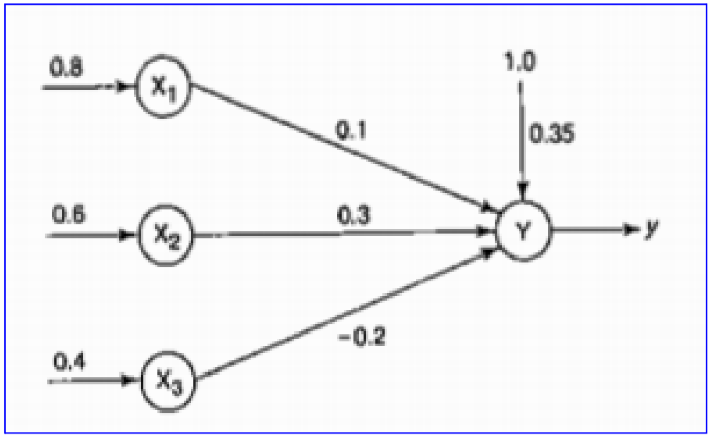

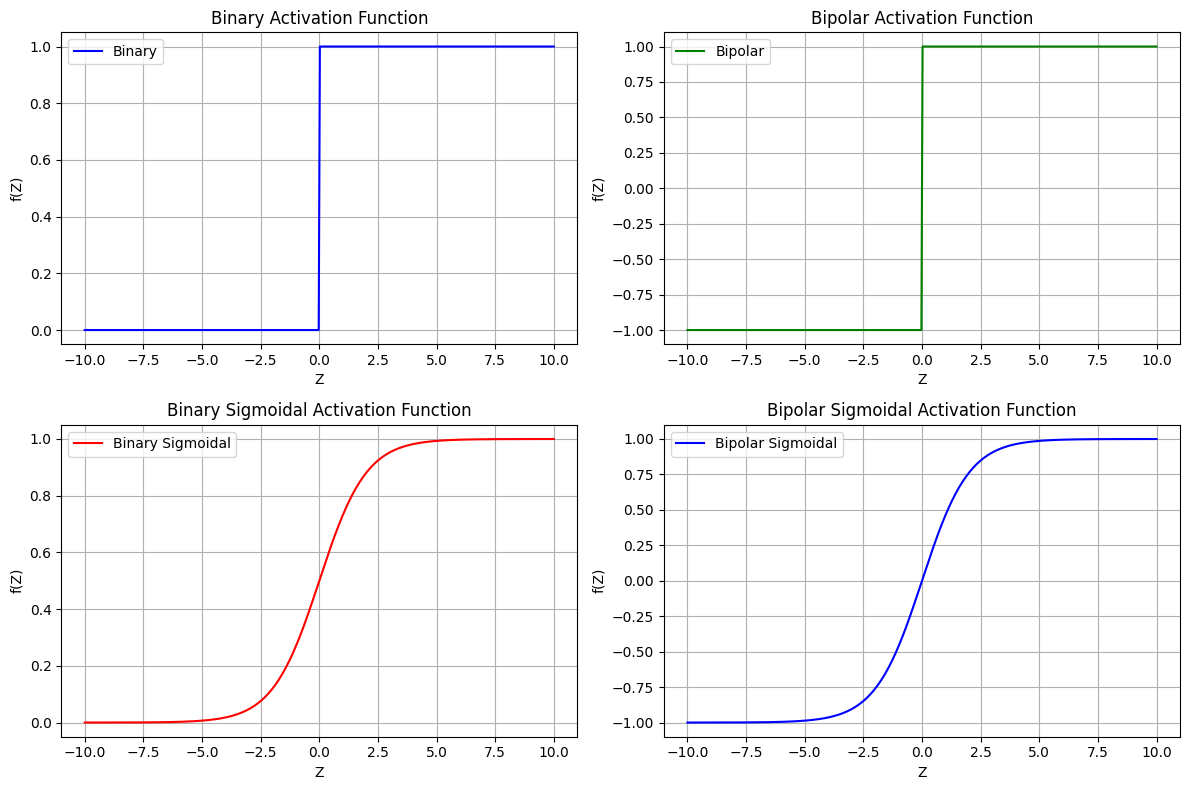

In [11]:
import matplotlib.pyplot as plt
Z = np.linspace(-10, 10, 400)
Y_binary_plot = [binary_activation(z) for z in Z]
Y_bipolar_plot = [bipolar_activation(z) for z in Z]
Y_binary_sigmoidal_plot = binary_sigmoidal_activation(Z)
Y_bipolar_sigmoidal_plot = bipolar_sigmoidal_activation(Z)
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(Z, Y_binary_plot, label='Binary', color='blue')
plt.title('Binary Activation Function')
plt.xlabel('Z')
plt.ylabel('f(Z)')
plt.grid(True)
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(Z, Y_bipolar_plot, label='Bipolar', color='green')
plt.title('Bipolar Activation Function')
plt.xlabel('Z')
plt.ylabel('f(Z)')
plt.grid(True)
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(Z, Y_binary_sigmoidal_plot, label='Binary Sigmoidal', color="red")
plt.title('Binary Sigmoidal Activation Function')
plt.xlabel('Z')
plt.ylabel('f(Z)')
plt.grid(True)
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(Z, Y_bipolar_sigmoidal_plot, label='Bipolar Sigmoidal', color="blue")
plt.title('Bipolar Sigmoidal Activation Function')
plt.xlabel('Z')
plt.ylabel('f(Z)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [3]:
import numpy as np

inputs = np.array([0.8, 0.6, 0.4])  
weights = np.array([0.1, 0.3, -0.2]) 
bias = 0.35 

# Calculating the net input (z) by taking the dot product of inputs and weights, then adding the bias
z = np.dot(inputs, weights) + bias

# It is returning 1 if z is greater than or equal to the threshold (theta), otherwise 0
def binary_activation(z, theta=0):
    return 1 if z >= theta else 0

# It is returning 1 if z is greater than or equal to the threshold (theta), otherwise -1
def bipolar_activation(z, theta=0):
    return 1 if z >= theta else -1

# It is calculating the sigmoid function and returning a value between 0 and 1
def binary_sigmoidal_activation(z):
    return 1 / (1 + np.exp(-z))

# It is calculating the sigmoid function and mapping it to a value between -1 and 1
def bipolar_sigmoidal_activation(z):
    return (2 / (1 + np.exp(-z))) - 1

binary = binary_activation(z)

bipolar = bipolar_activation(z)

binary_sigmoidal = binary_sigmoidal_activation(z)

bipolar_sigmoidal = bipolar_sigmoidal_activation(z)

print(f"Net input (z): {z}")
print(f"Binary activation output: {binary}")
print(f"Bipolar activation output: {bipolar}")
print(f"Binary sigmoidal activation output: {binary_sigmoidal}")
print(f"Bipolar sigmoidal activation output: {bipolar_sigmoidal}")


Net input (z): 0.53
Binary activation output: 1
Bipolar activation output: 1
Binary sigmoidal activation output: 0.6294831119673949
Bipolar sigmoidal activation output: 0.25896622393478985


# PROGRAM 2

## Implementation of Single Output and Multi Output Perceptron Network with activation function

### Section A : Implementation of perceptron for AND Gate

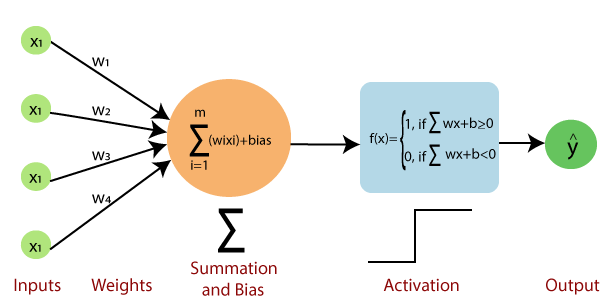

### AND GATE TRUTH TABLE
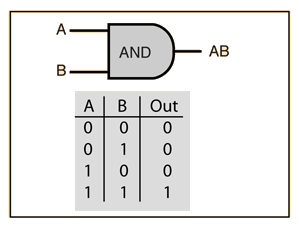

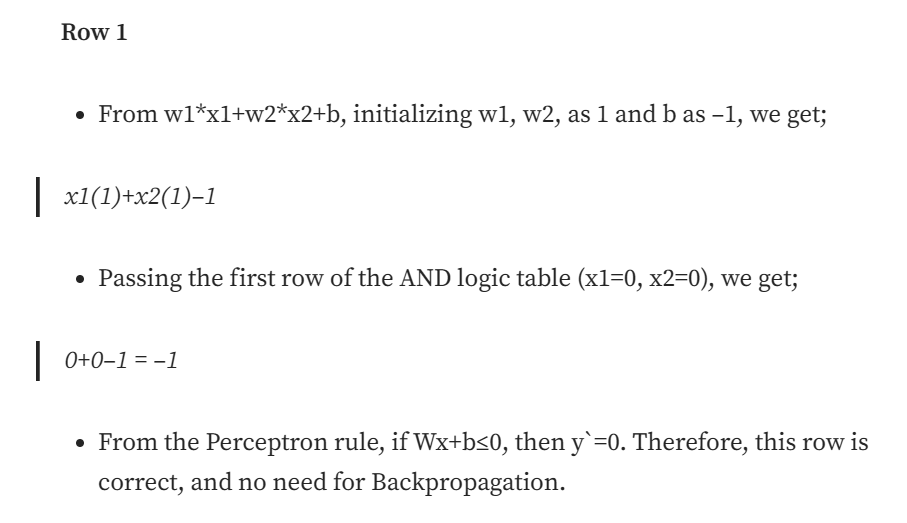
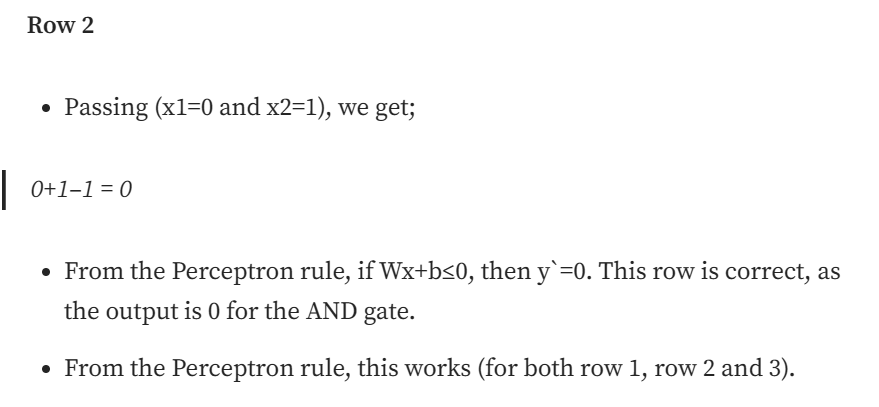
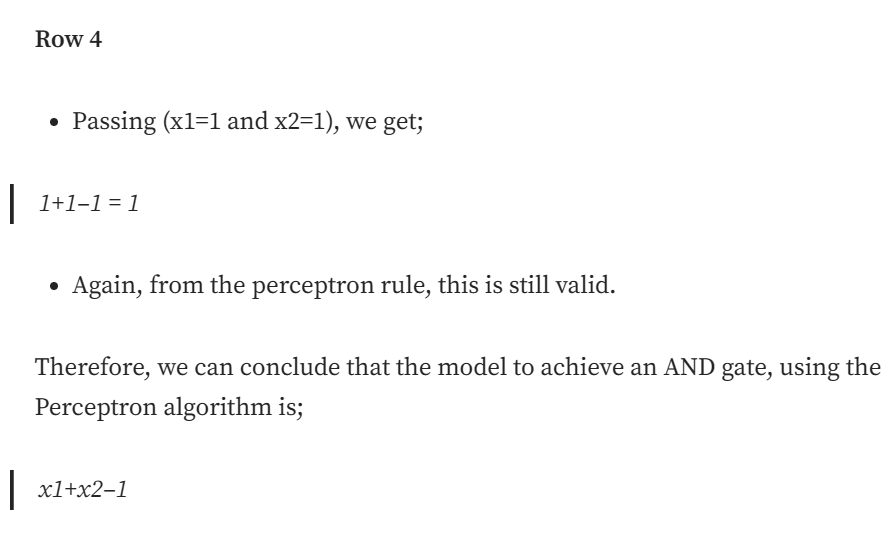

In [13]:
import numpy as np

# First we define the bipolar step activation function
def bipolar_step(z):
    return 1 if z >= 0 else -1

# Perceptron function
def perceptron(x1, x2, weights, bias):
    z = weights[0] * x1 + weights[1] * x2 + bias
    return bipolar_step(z)

training_data = [
    (1, 1, 1),    # AND logic: 1 AND 1 = 1
    (1, -1, -1),  # AND logic: 1 AND -1 = -1
    (-1, 1, -1),  # AND logic: -1 AND 1 = -1
    (-1, -1, -1)  # AND logic: -1 AND -1 = -1
]

weights = np.array([0.0, 0.0])
bias = 0.0 

learning_rate = 1
n_epochs = 5

# Training
for epoch in range(n_epochs):
    for x1, x2, expected in training_data:
        result = perceptron(x1, x2, weights, bias) 
        error = expected - result  
        weights[0] += learning_rate * error * x1  #w0 updation
        weights[1] += learning_rate * error * x2 #w1 updation
        bias += learning_rate * error  # bias updation

# Testing 
for x1, x2, expected in training_data:
    result = perceptron(x1, x2, weights, bias)
    print(f"Input: ({x1}, {x2}) -> Output: {result} (Expected: {expected})")

print(f"\nFinal weights: {weights}")
print(f"Final bias: {bias}")


Input: (1, 1) -> Output: 1 (Expected: 1)
Input: (1, -1) -> Output: -1 (Expected: -1)
Input: (-1, 1) -> Output: -1 (Expected: -1)
Input: (-1, -1) -> Output: -1 (Expected: -1)

Final weights: [2. 2.]
Final bias: -2.0


# Visualizing the decision boundary

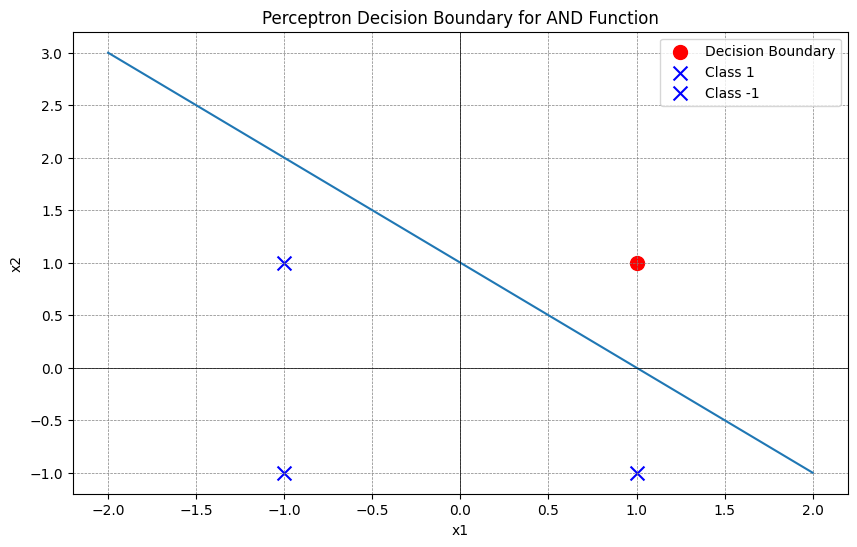

In [16]:
plt.figure(figsize=(10, 6))

for x1, x2, label in training_data:
    color = 'red' if label == 1 else 'blue'
    marker = 'o' if label == 1 else 'x'
    plt.scatter(x1, x2, color=color, marker=marker, s=100)

x_values = np.linspace(-2, 2, 200)
y_values = -(weights[0] * x_values + bias) / weights[1]
plt.plot(x_values, y_values, label='Decision Boundary')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('Perceptron Decision Boundary for AND Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['Decision Boundary', 'Class 1', 'Class -1'])
plt.show()

# Section B : Perceptron for IRIS dataset

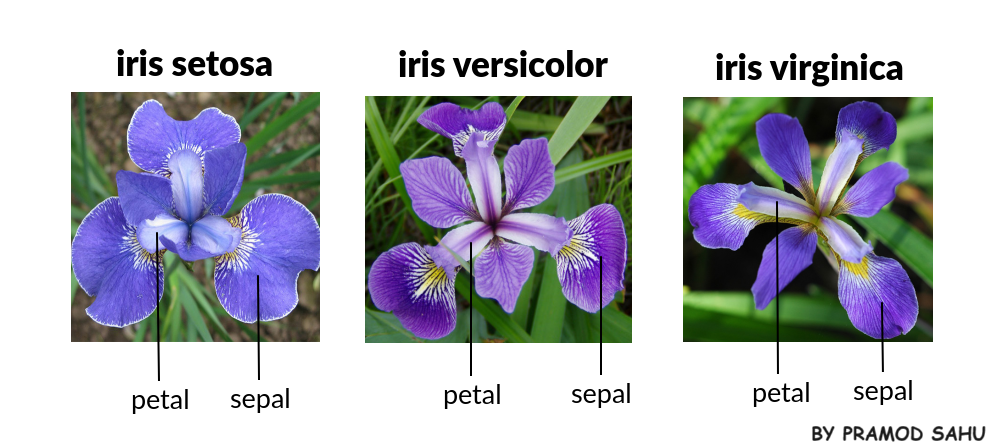

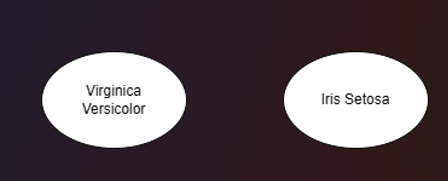

## BINARY OUTPUT CLASSIFIER

In [31]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class BinaryPerceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=1000):
        self.weights = np.zeros(input_size + 1)  # Including bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, x):
        x_with_bias = np.insert(x, 0, 1)
        weighted_sum = np.dot(self.weights, x_with_bias)
        return 1 if weighted_sum >= 0 else 0

    def train(self, X, y):
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                error = target - prediction
                self.weights[1:] += self.learning_rate * error * xi
                self.weights[0] += self.learning_rate * error

# Load Iris dataset
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Binary classification: Iris-setosa vs. others

# Standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training phase
binary_perceptron = BinaryPerceptron(input_size=4, learning_rate=0.01, epochs=1000)
binary_perceptron.train(X_train, y_train)

# Testing phase
predictions = [binary_perceptron.predict(x) for x in X_test]
accuracy = np.mean(predictions == y_test)
print(f"Binary Perceptron Accuracy: {accuracy * 100:.2f}%")

Binary Perceptron Accuracy: 100.00%


# VISUALIZING DECISION BOUNDARY BY TAKING 2 FEATURES FOR TRAINING

### Here we copy the same code as in the previous cell but take only 2 features of X since visualization is possible only in 2d.

Binary Perceptron Accuracy: 100.00%


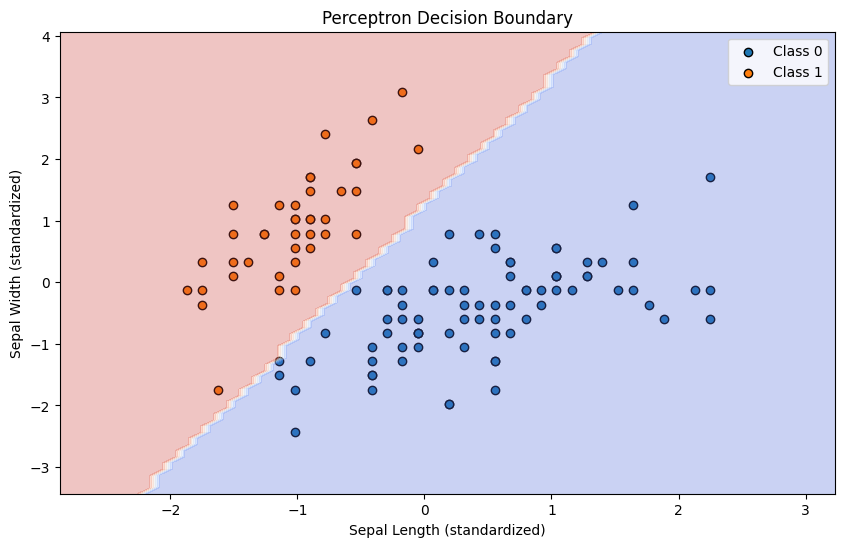

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class BinaryPerceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=1000):
        self.weights = np.zeros(input_size + 1)  
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, x):
        x_with_bias = np.insert(x, 0, 1)
        weighted_sum = np.dot(self.weights, x_with_bias)
        return 1 if weighted_sum >= 0 else 0

    def train(self, X, y):
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                error = target - prediction
                self.weights[1:] += self.learning_rate * error * xi
                self.weights[0] += self.learning_rate * error


iris = load_iris()
X = iris.data[:, :2] 
y = (iris.target == 0).astype(int)  

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

binary_perceptron = BinaryPerceptron(input_size=2, learning_rate=0.01, epochs=1000)
binary_perceptron.train(X_train, y_train)

predictions = [binary_perceptron.predict(x) for x in X_test]
accuracy = np.mean(predictions == y_test)
print(f"Binary Perceptron Accuracy: {accuracy * 100:.2f}%")

# Visualize decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Class 0', edgecolors='k')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Class 1', edgecolors='k')
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = np.array([binary_perceptron.predict(np.array([x1, x2])) for x1, x2 in zip(xx1.ravel(), xx2.ravel())])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='coolwarm')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()


## MULTI OUTPUT CLASSIFIER

In [37]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class MultiOutputPerceptron:
    def __init__(self, input_size, output_size, learning_rate=0.01, epochs=1000):
        self.weights = np.zeros((output_size, input_size + 1))  # Including bias for each output neuron
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, x):
        x_with_bias = np.insert(x, 0, 1)
        weighted_sum = np.dot(self.weights, x_with_bias)
        return np.argmax(weighted_sum)

    def train(self, X, y):
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                if prediction != target:
                    self.weights[target, 1:] += self.learning_rate * xi
                    self.weights[target, 0] += self.learning_rate
                    self.weights[prediction, 1:] -= self.learning_rate * xi
                    self.weights[prediction, 0] -= self.learning_rate

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize features 
# Standardization ensures that each feature contributes equally to the model, 
# preventing bias toward features with larger values.

#Gradient descent, the optimization algorithm often used in training machine learning models, 
#works more efficiently when features are on a similar scale.

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the multi-output perceptron
multi_perceptron = MultiOutputPerceptron(input_size=4, output_size=3, learning_rate=0.01, epochs=1000)
multi_perceptron.train(X_train, y_train)

# Test the multi-output perceptron
predictions = [multi_perceptron.predict(x) for x in X_test]
accuracy = np.mean(predictions == y_test)
print(f"Multi-output Perceptron Accuracy: {accuracy * 100:.2f}%")


Multi-output Perceptron Accuracy: 96.67%


# Random function generated data

Classify the given input vectors into 4 categories using a perceptron network
- with two input neurons and four output neurons.
- with two input neurons and two output neurons.

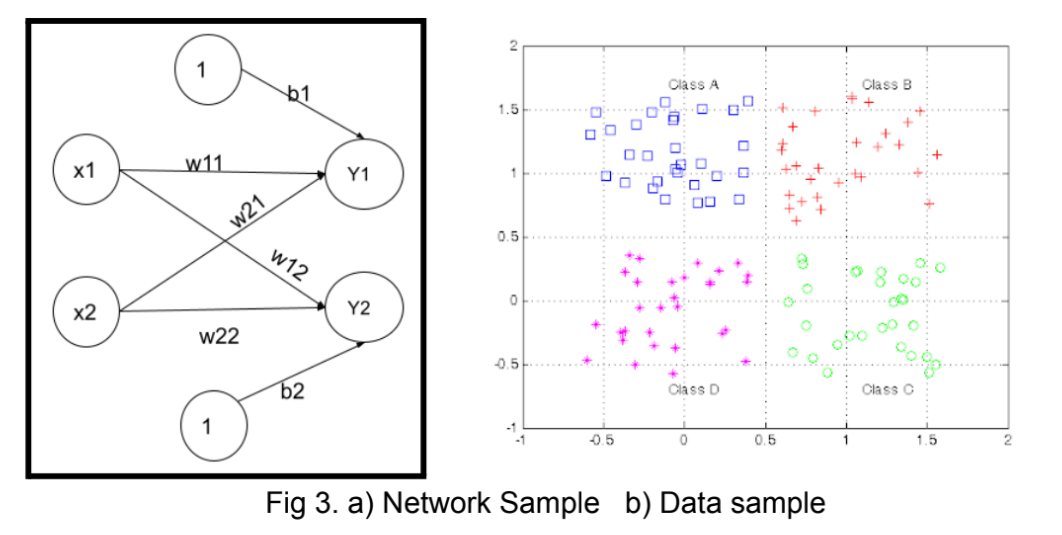

Perceptron with Four Output Neurons Accuracy: 100.00%


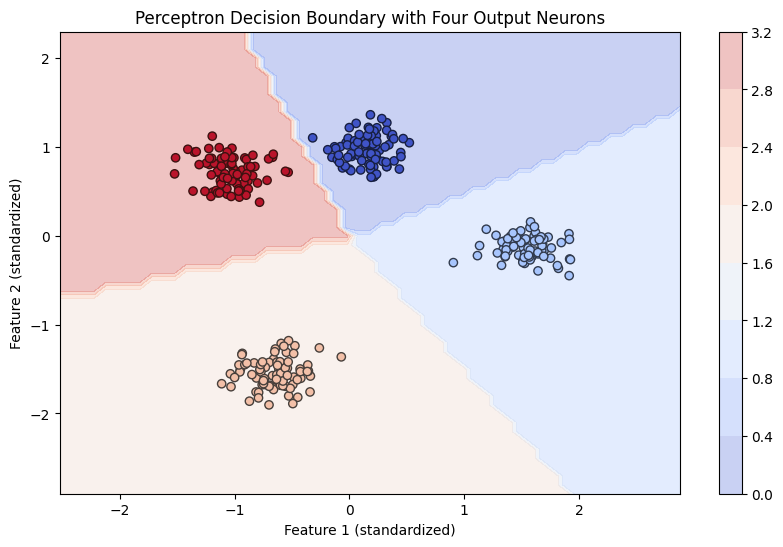

Perceptron with Two Output Neurons Accuracy: 71.25%


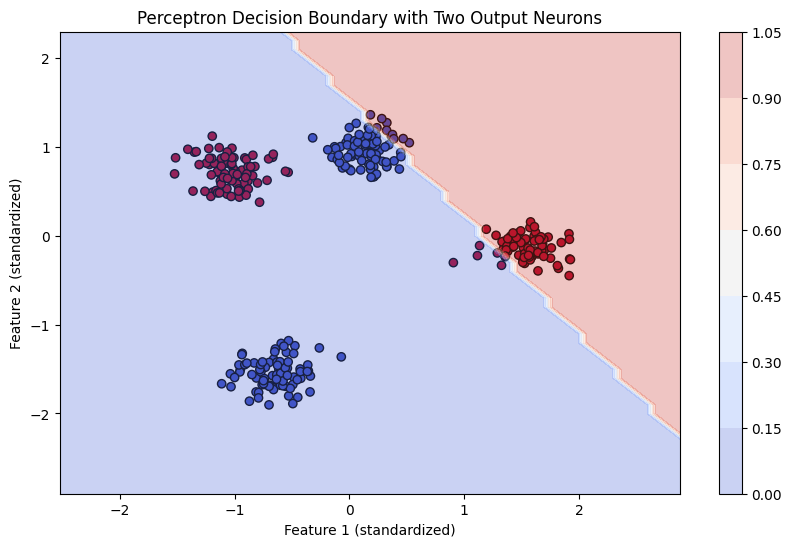

In [38]:
from sklearn.datasets import make_blobs

# class MultiOutputPerceptron:
#     def __init__(self, input_size, output_size, learning_rate=0.01, epochs=1000):
#         self.weights = np.zeros((output_size, input_size + 1))  # Including bias for each output neuron
#         self.learning_rate = learning_rate
#         self.epochs = epochs

#     def predict(self, x):
#         x_with_bias = np.insert(x, 0, 1)
#         weighted_sum = np.dot(self.weights, x_with_bias)
#         return np.argmax(weighted_sum)

#     def train(self, X, y):
#         for _ in range(self.epochs):
#             for xi, target in zip(X, y):
#                 prediction = self.predict(xi)
#                 if prediction != target:
#                     self.weights[target, 1:] += self.learning_rate * xi
#                     self.weights[target, 0] += self.learning_rate
#                     self.weights[prediction, 1:] -= self.learning_rate * xi
#                     self.weights[prediction, 0] -= self.learning_rate

# Generate synthetic dataset
X, y = make_blobs(n_samples=400, centers=4, cluster_std=1.0, random_state=42)
X = X[:, :2]  # Use only the first two features

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the perceptron with four output neurons
perceptron_4_outputs = MultiOutputPerceptron(input_size=2, output_size=4, learning_rate=0.01, epochs=1000)
perceptron_4_outputs.train(X_train, y_train)

# Test the perceptron with four output neurons
predictions_4_outputs = [perceptron_4_outputs.predict(x) for x in X_test]
accuracy_4_outputs = np.mean(predictions_4_outputs == y_test)
print(f"Perceptron with Four Output Neurons Accuracy: {accuracy_4_outputs * 100:.2f}%")

# Visualize decision boundary for perceptron with four output neurons
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap='coolwarm')
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = np.array([perceptron_4_outputs.predict(np.array([x1, x2])) for x1, x2 in zip(xx1.ravel(), xx2.ravel())])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='coolwarm')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.title('Perceptron Decision Boundary with Four Output Neurons')
plt.colorbar()
plt.show()

# Now train the perceptron with two output neurons
# Convert y to one-hot encoding for two output neurons
y_train_one_hot = np.zeros((y_train.size, 2))
y_train_one_hot[np.arange(y_train.size), y_train % 2] = 1

perceptron_2_outputs = MultiOutputPerceptron(input_size=2, output_size=2, learning_rate=0.01, epochs=1000)
perceptron_2_outputs.train(X_train, y_train % 2)

# Test the perceptron with two output neurons
predictions_2_outputs = [perceptron_2_outputs.predict(x) for x in X_test]
accuracy_2_outputs = np.mean(predictions_2_outputs == (y_test % 2))
print(f"Perceptron with Two Output Neurons Accuracy: {accuracy_2_outputs * 100:.2f}%")

# Visualize decision boundary for perceptron with two output neurons
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train % 2, edgecolors='k', cmap='coolwarm')
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = np.array([perceptron_2_outputs.predict(np.array([x1, x2])) for x1, x2 in zip(xx1.ravel(), xx2.ravel())])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='coolwarm')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.title('Perceptron Decision Boundary with Two Output Neurons')
plt.colorbar()
plt.show()


### This was building a perceptron from scratch .We can also import the Perceptron model from sklearn as shown below and lets see what happens.

Perceptron with Four Output Neurons Accuracy: 98.75%


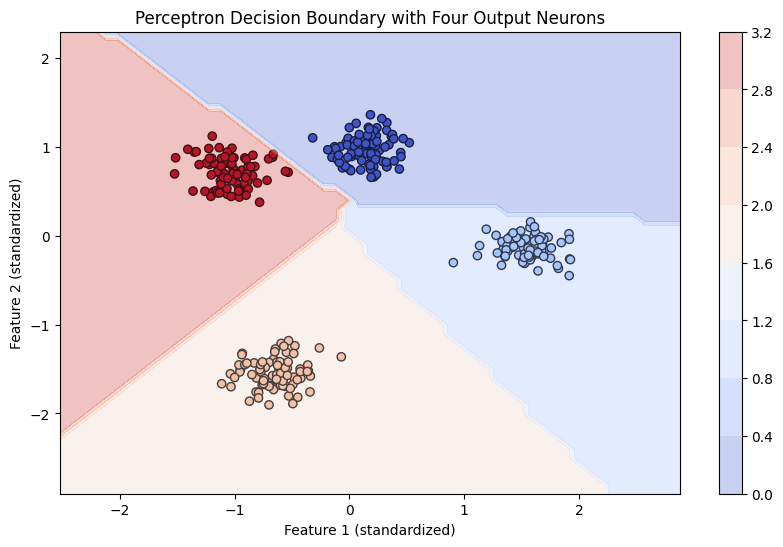

Perceptron with Two Output Neurons Accuracy: 80.00%


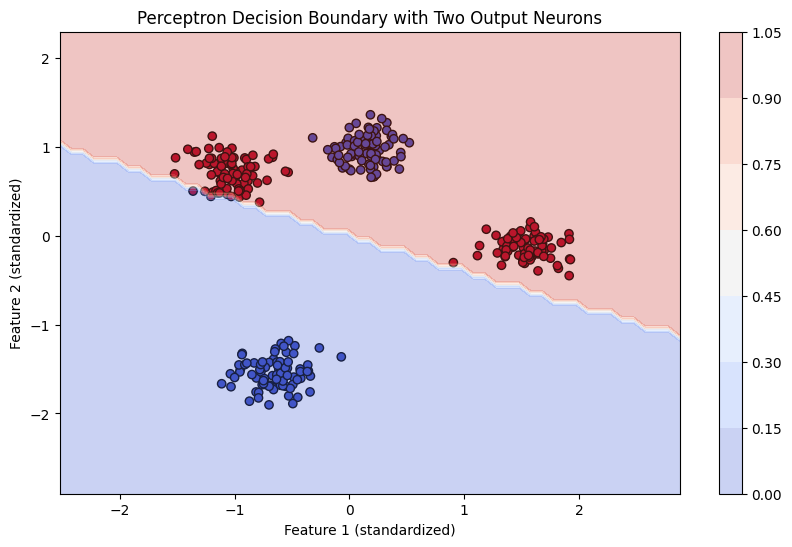

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

X, y = make_blobs(n_samples=400, centers=4, cluster_std=1.0, random_state=42)
X = X[:, :2] 

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

perceptron_4_outputs = Perceptron(max_iter=1000, eta0=0.01, random_state=42)
perceptron_4_outputs.fit(X_train, y_train)

predictions_4_outputs = perceptron_4_outputs.predict(X_test)
accuracy_4_outputs = accuracy_score(y_test, predictions_4_outputs)
print(f"Perceptron with Four Output Neurons Accuracy: {accuracy_4_outputs * 100:.2f}%")

plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap='coolwarm')
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = perceptron_4_outputs.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='coolwarm')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.title('Perceptron Decision Boundary with Four Output Neurons')
plt.colorbar()
plt.show()

# Now train the perceptron with two output neurons

y_train_binary = y_train % 2
y_test_binary = y_test % 2

perceptron_2_outputs = Perceptron(max_iter=1000, eta0=0.01, random_state=42)
#eta0 is learning rate and max_iter is aka epochs
perceptron_2_outputs.fit(X_train, y_train_binary)


predictions_2_outputs = perceptron_2_outputs.predict(X_test)
accuracy_2_outputs = accuracy_score(y_test_binary, predictions_2_outputs)
print(f"Perceptron with Two Output Neurons Accuracy: {accuracy_2_outputs * 100:.2f}%")

plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_binary, edgecolors='k', cmap='coolwarm')
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = perceptron_2_outputs.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='coolwarm')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.title('Perceptron Decision Boundary with Two Output Neurons')
plt.colorbar()
plt.show()
